In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pandas_profiling as pp
from catboost.datasets import titanic

In [5]:
# !pip install markupsafe==2.0.1

In [ ]:
!pip install soft_unicode

In [ ]:
!pip install pandas_profiling

In [ ]:
!pip show pandas_profiling

In [ ]:
# !pip uninstall -y pandas_profiling

In [ ]:
# !anaconda --version

In [ ]:
# !pip install networkx

In [ ]:
# !pip install catboost

In [25]:
titanic_train,titanic_test = titanic()

In [26]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
print("train data shape:\n",titanic_train.shape)
print("test data shape:\n",titanic_test.shape)

train data shape:
 (891, 12)
test data shape:
 (418, 11)


# notice the missing target feature in test dataset

In [29]:
# from pandas_profiling import ProfileReport 
# ProfileReport(titanic_train)

In [30]:
# !pip install ipywidgets

In [31]:
# !jupyter nbextension enable --py widgetsnbextension

In [32]:
titanic_train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

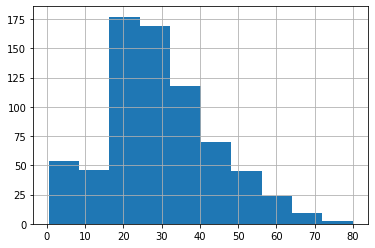

In [33]:
#check the distribution of age- if its normal distribution mean value can be imputed for missing values
titanic_train["Age"].hist(bins=10)

In [34]:
import seaborn as sns

C:\Users\Shailu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

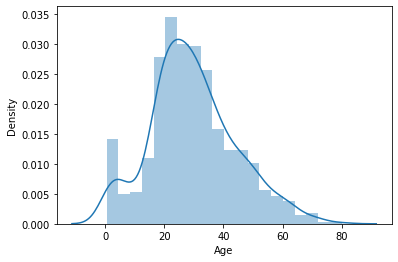

In [35]:
sns.distplot(titanic_train["Age"],hist=True)

In [20]:
titanic_train["Age"].mean()

29.69911764705882

In [36]:
titanic_train["Age"]=titanic_train["Age"].fillna(titanic_train["Age"].mean())

In [37]:
titanic_train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
titanic_train["Pclass"].astype(float)

0      3.0
1      1.0
2      3.0
3      1.0
4      3.0
      ... 
886    2.0
887    1.0
888    3.0
889    1.0
890    3.0
Name: Pclass, Length: 891, dtype: float64

In [ ]:
titanic_train["Cabin"]

In [68]:
titanic_train[titanic_train.columns].dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [58]:
titanic_train["Embarked"] =titanic_train["Embarked"].replace(np.nan,"Unknown",regex=True)

In [70]:
np.where(titanic_train[titanic_train.columns].dtypes !=np.float)[0]

C:\Users\Shailu\AppData\Local\Temp/ipykernel_4812/525096448.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.where(titanic_train[titanic_train.columns].dtypes !=np.float)[0]


array([ 0,  1,  2,  3,  4,  6,  7,  8, 10, 11], dtype=int64)

In [73]:
titanic_train["Pclass"] = titanic_train["Pclass"].astype(float)

In [80]:
for c in titanic_train.columns:
    if titanic_train[c].dtype == np.int64:
        titanic_train[c] = titanic_train[c].astype(float)

In [81]:
titanic_train[titanic_train.columns].dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [82]:
#all non float columns
np.where(titanic_train[titanic_train.columns].dtypes !=np.float)[0]

C:\Users\Shailu\AppData\Local\Temp/ipykernel_4812/525096448.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.where(titanic_train[titanic_train.columns].dtypes !=np.float)[0]


array([ 3,  4,  8, 10, 11], dtype=int64)

In [83]:
from catboost import CatBoostClassifier

In [87]:
target = "Survived"
features = ["Pclass","Sex","Age","Embarked"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(titanic_train[features],titanic_train[target],test_size=0.3,random_state=101)


In [89]:
#specify which features are categorical for catboost

features_categorical = np.where(X_train[features].dtypes != np.float)[0]

print("categorical features: \n",features_categorical)



categorical features: 
 [1 3]


C:\Users\Shailu\AppData\Local\Temp/ipykernel_4812/1755306614.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features_categorical = np.where(X_train[features].dtypes != np.float)[0]


In [91]:
params = {'iterations':1000,
          'learning_rate':0.01,
          'cat_features':features_categorical,
          'depth':3,
          'eval_metric':'AUC',
          'verbose':200,
          'od_type':"Iter",
          'od_wait':500
         }

classifierModel = CatBoostClassifier(**params)
classifierModel.fit(X_train,y_train,eval_set=(X_test,y_test),use_best_model=True,plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8148781	best: 0.8148781 (0)	total: 14.6ms	remaining: 14.6s
200:	test: 0.8491684	best: 0.8503076 (70)	total: 1.69s	remaining: 6.7s
400:	test: 0.8502221	best: 0.8505069 (342)	total: 3.34s	remaining: 4.99s
600:	test: 0.8510481	best: 0.8520164 (483)	total: 5.01s	remaining: 3.32s
800:	test: 0.8482000	best: 0.8520164 (483)	total: 6.7s	remaining: 1.66s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8520164046
bestIteration = 483

Shrink model to first 484 iterations.


In [92]:
classifierModel.get_feature_importance()

array([24.87559729, 57.76229121, 11.34806543,  6.01404608])

In [93]:
zip(features,classifierModel.get_feature_importance())

In [94]:
#feature importance 
feature_import = [s for s in zip(features,classifierModel.get_feature_importance())]

In [95]:
feature_import

[('Pclass', 24.87559728526353),
 ('Sex', 57.762291211537445),
 ('Age', 11.348065426170821),
 ('Embarked', 6.014046077028239)]

In [96]:
feature_import_df = pd.DataFrame(feature_import,columns=["Features","Importance"])

In [98]:
feature_import_df.sort_values("Importance",ascending=False)

,Features,Importance
1,Sex,57.762291
0,Pclass,24.875597
2,Age,11.348065
3,Embarked,6.014046
